In [1]:
import numpy as np, pandas as pd
import os
import matplotlib.pyplot as plt
import gc

# Application record
"""Use pandas.read_csv to read application_record.csv in memory. There will be a pandas DataFrame having the following columns:

1. SK_ID_CURR: Unique Id of the row

2. TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

3. CODE_GENDER: Gender of the applicant. M is male and F is female.

4. FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.

5. FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.

6. CNT_CHILDREN: Count of children.

7. AMT_INCOME_TOTAL: the amount of the income.

8. NAME_INCOME_TYPE: The type of income (8 types in total).

9. NAME_EDUCATION_TYPE: The type of education (5 types in total).

10. NAME_FAMILY_STATUS: The type of family status (6 types in total).

11. DAYS_BIRTH: The number of the days from birth (Negative values).

12. DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.

13. FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.

14. FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.

15. FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.

16. OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.

17. CNT_FAM_MEMBERS: The count of family members.

18. WORK_TIME : Long Time they works

19. AGE : The Applicants Age

20. REGION_RATING_CLIENT : Our rating of the region where client lives (1,2,3)

21. AMT_CREDIT : Credit amount of the loan

# Importing Data Application

In [2]:
aplication = pd.read_csv("application_train.csv")

In [3]:
aplication.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploring Data Application

In [4]:
aplication.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
aplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
print('Number of row Application data is', aplication.shape[0])
print('Number of columns Application data is', aplication.shape[1])

Number of row Application data is 307511
Number of columns Application data is 122


Drop the columns that we don't use

In [7]:
drop_cols=['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','YEARS_BEGINEXPLUATATION_MEDI','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','DAYS_LAST_PHONE_CHANGE','FLAG_MOBIL',
               'YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','DAYS_ID_PUBLISH',
               'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','BASEMENTAREA_MEDI','OWN_CAR_AGE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','NAME_TYPE_SUITE','ORGANIZATION_TYPE','DAYS_REGISTRATION','REGION_RATING_CLIENT']
aplication2 = aplication.drop(drop_cols, axis=1)

In [8]:
aplication2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')

In [9]:
aplication2.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,-9461,-637,0,1,0,Laborers,1.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,-16765,-1188,0,1,0,Core staff,2.0,1


In [10]:
aplication2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

# Defining Variable 

In this project, the main objective is to predict individuals on their ability to make payments on loans/credits. Therefore, the target variable used must reflect the individual's ability in this regard.

In this dataset, the loan_status variable is a variable that can be used as a target variable because it reflects the performance of each individual in making payments on loans/credits so far.

In [11]:
print(f'comparison between the ability to make payments\n',aplication2['TARGET'].value_counts(normalize=True)*100)

comparison between the ability to make payments
 0    91.927118
1     8.072882
Name: TARGET, dtype: float64


it can be seen that the number of individuals marked with 1 is much less than the number of individuals marked with 0. This causes this problem to become an imbalanced dataset problem.

# Featuring Engineering

In [12]:
aplication2['AGE'] = aplication2['DAYS_BIRTH'] / -365
aplication2['AGE'] = aplication2['AGE'].apply(np.floor)

In [13]:
aplication2['WORK_TIME'] = aplication2['DAYS_EMPLOYED'] / -365
aplication2['WORK_TIME'] = aplication2['WORK_TIME'].apply(np.floor)

In [14]:
aplication2.drop('DAYS_BIRTH', axis=1, inplace=True)
aplication2.drop('DAYS_EMPLOYED', axis=1, inplace=True)

# Handling Missing Value, NA

In [15]:
print(f'Duplicates in applications df:{aplication2.iloc[:,1:].duplicated().sum()}, ({np.round(100*aplication2.iloc[:,1:].duplicated().sum()/len(aplication2),1)}%)')

Duplicates in applications df:382, (0.1%)


In [16]:
aplication2.drop_duplicates(keep='first', inplace=True)

In [17]:
print(f'After romove Duplicates in applications df:{aplication2.iloc[:,1:].duplicated().sum()}, ({np.round(100*aplication2.iloc[:,1:].duplicated().sum()/len(aplication2),1)}%)')

After romove Duplicates in applications df:382, (0.1%)


In [18]:
#checing the missing values(%)
def chek_missing(df):
    sum_NAN = aplication2.isnull().sum().reset_index()
    sum_NAN.columns = ['Columns', 'NaN_count']
    sum_NAN["Percentage"] = sum_NAN.NaN_count/len(df)*100
    return sum_NAN.sort_values("Percentage", ascending =  False)
chek_missing(aplication2)

,Columns,NaN_count,Percentage
18,OCCUPATION_TYPE,96391,31.345545
10,AMT_GOODS_PRICE,278,0.090403
9,AMT_ANNUITY,12,0.003902
19,CNT_FAM_MEMBERS,2,0.000650
0,SK_ID_CURR,0,0.000000
13,NAME_FAMILY_STATUS,0,0.000000
21,AGE,0,0.000000
20,REGION_RATING_CLIENT_W_CITY,0,0.000000
17,FLAG_EMAIL,0,0.000000
16,FLAG_PHONE,0,0.000000


In [19]:
mean1 = aplication2["AMT_GOODS_PRICE"].mean()
aplication2["AMT_GOODS_PRICE"] = aplication2["AMT_GOODS_PRICE"].replace(np.nan, mean1)
mean2 = aplication2["AMT_ANNUITY"].mean()
aplication2["AMT_ANNUITY"] = aplication2["AMT_ANNUITY"].replace(np.nan, mean1)

In [20]:
aplication2['OCCUPATION_TYPE'].fillna('Others', inplace=True)
aplication2['CNT_FAM_MEMBERS'].fillna('0', inplace=True)

In [21]:
aplication2.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
FLAG_WORK_PHONE                0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
AGE                            0
WORK_TIME                      0
dtype: int64

# DF Application Correlation Checking

<AxesSubplot:>

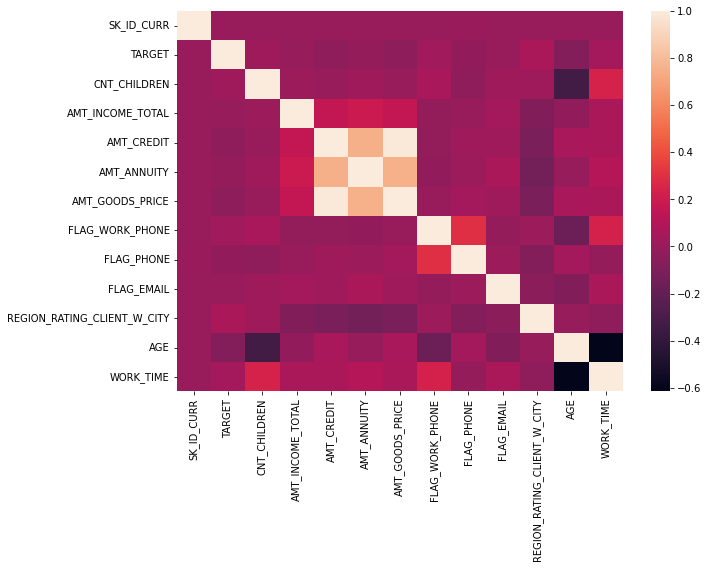

In [22]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(aplication2.corr())

The correlation value between those used as a benchmark as a high correlation is uncertain, generally the number 0.7 . is used

In [23]:
#Uji multikolinearitas
correlation_matrix = aplication2.corr().abs()
Upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in Upper.columns if any(Upper[column] > 0.7)]
print('columns under <0.7 :',to_drop)
#Uji multikolinearitas

columns under <0.7 : ['AMT_ANNUITY', 'AMT_GOODS_PRICE']


C:\Users\USER\AppData\Local\Temp\ipykernel_7408\1495178986.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [24]:
aplication2.drop(to_drop, axis=1, inplace=True)

In [25]:
aplication2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

# Check Categorical Feature in DF Application

In [26]:
aplication2.select_dtypes(exclude='object').nunique()

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
FLAG_WORK_PHONE                     2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT_W_CITY         3
AGE                                50
WORK_TIME                          51
dtype: int64

In [27]:
aplication2.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE      2
CODE_GENDER             3
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      6
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        19
CNT_FAM_MEMBERS        18
dtype: int64

In [28]:
for col in aplication2.select_dtypes(include='object').columns.tolist():
    print(aplication2[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
S

# VIZ EDA

In [29]:
#Gender proportion in applicants
gender_val = aplication2.CODE_GENDER.value_counts(normalize = True)
gender_val

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [30]:
aplication2 = aplication2[~aplication2['CODE_GENDER'].str.contains('XNA')]

In [31]:
#Gender proportion in applicants
gender_val = aplication2.CODE_GENDER.value_counts(normalize = True)
gender_val

F    0.658352
M    0.341648
Name: CODE_GENDER, dtype: float64

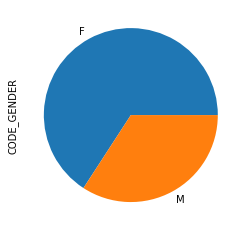

In [32]:
gender_val.plot.pie()
plt.show()

In [33]:
#Name_income_type proportion in applicants
income_type_val = aplication2.NAME_INCOME_TYPE.value_counts(normalize = True,)
income_type_val

Working                 0.516317
Commercial associate    0.232892
Pensioner               0.180035
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

Around 65.83% of the applicants are female

House / apartment      0.887346
With parents           0.048259
Municipal apartment    0.036363
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


<AxesSubplot:>

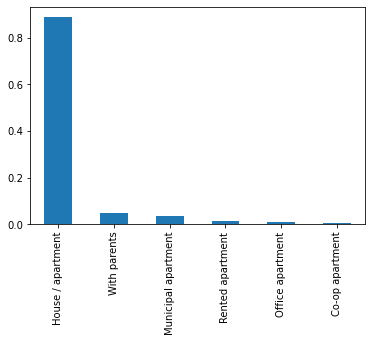

In [34]:
house_value = aplication2.NAME_HOUSING_TYPE.value_counts(normalize=True)
print(house_value)
house_value.plot.bar()

around 88.73% of applicants own a house or apartment

In [35]:
#House Ownership percentage
housing_ownership_count = aplication2.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'SK_ID_CURR': 'count'})

In [36]:
housing_ownership_percent = housing_ownership_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
housing_ownership_percent

SK_ID_CURR
CODE_GENDER NAME_HOUSING_TYPE              
F           Co-op apartment        0.332925
            House / apartment     89.698095
            Municipal apartment    3.888900
            Office apartment       0.757231
            Rented apartment       1.349976
            With parents           3.972872
M           Co-op apartment        0.426427
            House / apartment     86.877850
            Municipal apartment    3.149659
            Office apartment       1.031801
            Rented apartment       2.044565
            With parents           6.469698

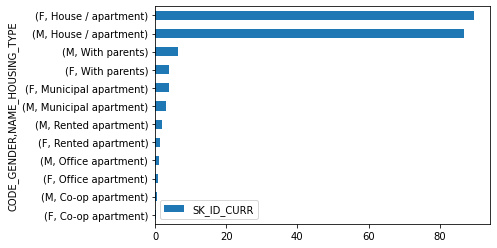

In [37]:
housing_ownership_percent.sort_values(by = 'SK_ID_CURR').plot.barh()
plt.show()

Housing ownership percentage for females is 89.6% while for males it is 87.5%. Females applicants have higher house ownership percentage.

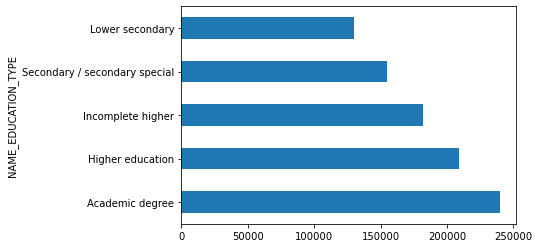

In [38]:
#Education level and income relation
aplication2.groupby(["NAME_EDUCATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

it can be seen from the bar plot that the average income increases with the education level of the applicants

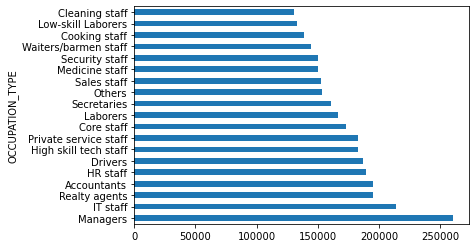

In [39]:
#Occupation type and income relation
aplication2.groupby(["OCCUPATION_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

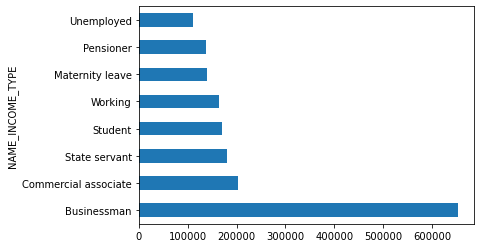

In [40]:
#Income Typel and income relation
aplication2.groupby(["NAME_INCOME_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

it can be seen from the bar plot that the Bussinessman have the largest Amount income total 

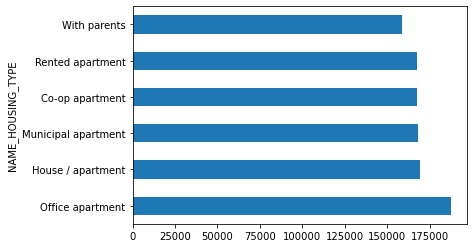

In [41]:
#Education level and income relation
aplication2.groupby(["NAME_HOUSING_TYPE"]).AMT_INCOME_TOTAL.mean().sort_values(ascending=False).plot.barh()
plt.show()

As we can see people with office appartment have the most Income Total above a 175K

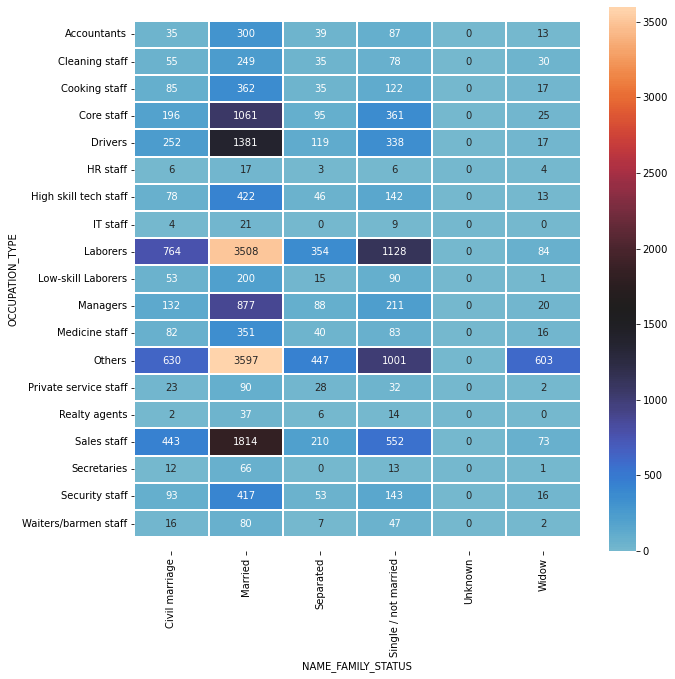

In [42]:
pivot = pd.pivot_table(data = aplication2, index = ['OCCUPATION_TYPE'], columns = ['NAME_FAMILY_STATUS'], values = 'TARGET', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,10])
heatmap = sns.heatmap(data = pivot, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

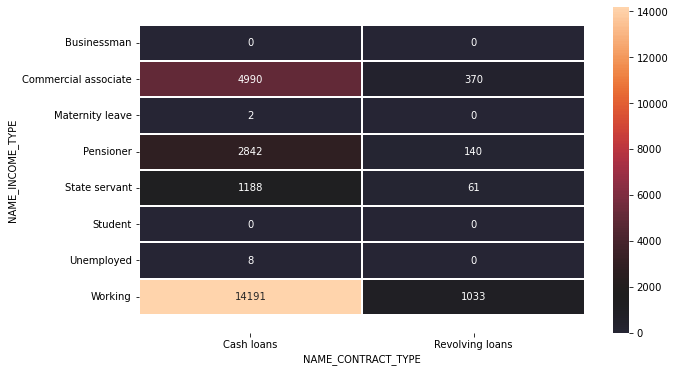

In [43]:
pvt_tbl = pd.pivot_table(data = aplication2, index = ['NAME_INCOME_TYPE'], columns = ['NAME_CONTRACT_TYPE'], values = 'TARGET', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[10,6])
hm = sns.heatmap(data = pvt_tbl, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [44]:
aplication2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   NAME_INCOME_TYPE             307507 non-null  object 
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_FAMILY_STATUS           307507 non-null  object 
 12  NAME_HOUSING_TYPE            307507 non-null  object 
 13 

# Feature Engineering 2

In [45]:
#Convert binary categorical columns to have integer value
aplication2['CODE_GENDER'] = aplication2.CODE_GENDER.apply(lambda x : 0 if x == 'M' else 1)
aplication2['FLAG_OWN_CAR'] = aplication2.FLAG_OWN_CAR.apply(lambda x : 0 if x == 'N' else 1)
aplication2['FLAG_OWN_REALTY'] = aplication2.FLAG_OWN_REALTY.apply(lambda x : 0 if x == 'N' else 1)
aplication2['NAME_CONTRACT_TYPE'] = aplication2.NAME_CONTRACT_TYPE.apply(lambda x : 0 if x == 'Cash loans' else 1)

In [46]:
aplication2['NAME_CONTRACT_TYPE'].unique()

array([0, 1], dtype=int64)

In [47]:
#CNT_FAM_MEMBERS can not be float. Convert the column to int type
aplication2['CNT_FAM_MEMBERS'] = aplication2['CNT_FAM_MEMBERS'].astype('int')
aplication2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AGE,WORK_TIME
0,100002,1,0,0,0,1,0,202500.0,406597.5,Working,...,Single / not married,House / apartment,0,1,0,Laborers,1,2,25.0,1.0
1,100003,0,0,1,0,0,0,270000.0,1293502.5,State servant,...,Married,House / apartment,0,1,0,Core staff,2,1,45.0,3.0
2,100004,0,1,0,1,1,0,67500.0,135000.0,Working,...,Single / not married,House / apartment,1,1,0,Laborers,1,2,52.0,0.0
3,100006,0,0,1,0,1,0,135000.0,312682.5,Working,...,Civil marriage,House / apartment,0,0,0,Laborers,2,2,52.0,8.0
4,100007,0,0,0,0,1,0,121500.0,513000.0,Working,...,Single / not married,House / apartment,0,0,0,Core staff,1,2,54.0,8.0


Replacing all the WORK_TIME for all pensioners to be -1.

In [48]:
aplication2['WORK_TIME'] = aplication2.WORK_TIME.apply(lambda x : -1 if x<0 else x)

# Find the bad/good applicant proportion with target and def a dunction to recognize them

In [49]:
def bad_cust_proportion(columns) :
    bad_prop_cnt = aplication.groupby([columns,'TARGET']).agg({'SK_ID_CURR': 'count'})
    bad_prop_percent = bad_prop_cnt.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    return bad_prop_percent

In [50]:
bad_cust_proportion('FLAG_OWN_CAR')

SK_ID_CURR
FLAG_OWN_CAR TARGET            
N            0        91.499773
             1         8.500227
Y            0        92.756270
             1         7.243730

Proportion of bad customers for people who own a car is less than those who don't own a car

In [51]:
bad_cust_proportion('NAME_HOUSING_TYPE')

SK_ID_CURR
NAME_HOUSING_TYPE   TARGET            
Co-op apartment     0        92.067736
                    1         7.932264
House / apartment   0        92.204289
                    1         7.795711
Municipal apartment 0        91.460252
                    1         8.539748
Office apartment    0        93.427589
                    1         6.572411
Rented apartment    0        87.686949
                    1        12.313051
With parents        0        88.301887
                    1        11.698113

People living on Office appartment have little proportion of bad customers. otherwise people living in Office appartment haven't dificulties to make a payment with percentage 93.4%

In [52]:
bad_cust_proportion('NAME_FAMILY_STATUS')

SK_ID_CURR
NAME_FAMILY_STATUS   TARGET            
Civil marriage       0        90.055416
                     1         9.944584
Married              0        92.440132
                     1         7.559868
Separated            0        91.805766
                     1         8.194234
Single / not married 0        90.192325
                     1         9.807675
Unknown              0       100.000000
Widow                0        94.175783
                     1         5.824217

Single customers have a higher proportion of bad customers as compared to married customers

In [53]:
bad_cust_proportion('OCCUPATION_TYPE')

SK_ID_CURR
OCCUPATION_TYPE       TARGET            
Accountants           0        95.169673
                      1         4.830327
Cleaning staff        0        90.393295
                      1         9.606705
Cooking staff         0        89.556004
                      1        10.443996
Core staff            0        93.696046
                      1         6.303954
Drivers               0        88.673870
                      1        11.326130
HR staff              0        93.605684
                      1         6.394316
High skill tech staff 0        93.840070
                      1         6.159930
IT staff              0        93.536122
                      1         6.463878
Laborers              0        89.421230
                      1        10.578770
Low-skill Laborers    0        82.847587
                      1        17.152413
Managers              0        93.785972
                      1         6.214028
Medicine staff        0        93.299754
                      1         6.700246
Private service staff 0        93.401207
                      1         6.598793
Realty agents         0        92.143808
                      1         7.856192
Sales staff           0        90.368201
                      1         9.631799
Secretaries           0        92.950192
                      1         7.049808
Security staff        0        89.257551
                      1        10.742449
Waiters/barmen staff  0        88.724036
                      1        11.275964

Accountants staff have the little proportion of bad customer around 95,16%

In [54]:
bad_cust_proportion('NAME_INCOME_TYPE')

SK_ID_CURR
NAME_INCOME_TYPE     TARGET            
Businessman          0       100.000000
Commercial associate 0        92.515743
                     1         7.484257
Maternity leave      0        60.000000
                     1        40.000000
Pensioner            0        94.613634
                     1         5.386366
State servant        0        94.245035
                     1         5.754965
Student              0       100.000000
Unemployed           0        63.636364
                     1        36.363636
Working              0        90.411528
                     1         9.588472

In [55]:
aplication2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  int64  
 3   CODE_GENDER                  307507 non-null  int64  
 4   FLAG_OWN_CAR                 307507 non-null  int64  
 5   FLAG_OWN_REALTY              307507 non-null  int64  
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   NAME_INCOME_TYPE             307507 non-null  object 
 10  NAME_EDUCATION_TYPE          307507 non-null  object 
 11  NAME_FAMILY_STATUS           307507 non-null  object 
 12  NAME_HOUSING_TYPE            307507 non-null  object 
 13 

# Checking The Outliers

In [56]:
def box_plot(df,col) :
    sns.boxplot(data = df, y = col)
    plt.show()

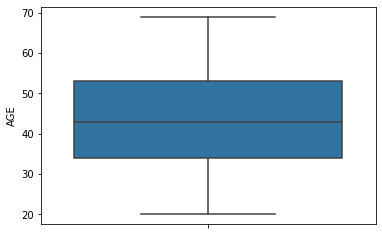

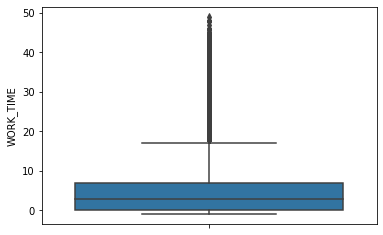

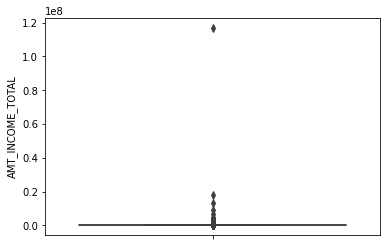

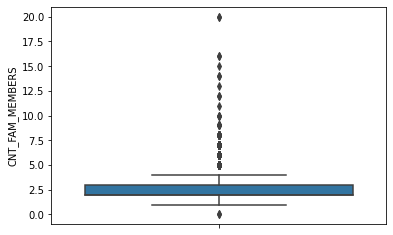

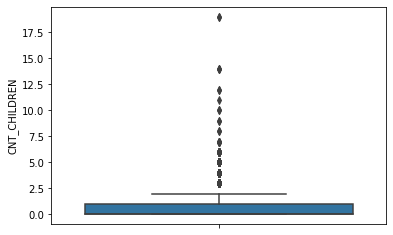

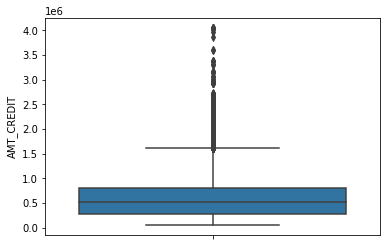

In [57]:
boxplt_col = ["AGE","WORK_TIME","AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","CNT_CHILDREN", 'AMT_CREDIT',]
for col in boxplt_col :
    box_plot(aplication2,col)

# CALCULATING IV & WOE VALUES FROM APPLICATON DF

Apa itu Bobot Bukti (WOE)?
Bobot bukti menunjukkan kekuatan prediksi dari variabel independen dalam kaitannya dengan variabel dependen. Sejak berevolusi dari dunia penilaian kredit, umumnya digambarkan sebagai ukuran pemisahan pelanggan yang baik dan buruk. "Pelanggan Buruk" mengacu pada pelanggan yang gagal membayar pinjaman. dan "Pelanggan Baik" mengacu pada pelanggan yang membayar kembali pinjaman.

Penggunaan WOE
Weight of Evidence (WOE) membantu untuk mengubah variabel independen kontinu menjadi satu set kelompok atau bin berdasarkan kesamaan distribusi variabel dependen yaitu jumlah peristiwa dan non-peristiwa.

Aturan terkait WOE

1. Setiap kategori (bin) harus memiliki setidaknya 5% dari pengamatan.

2. Setiap kategori (bin) harus bukan nol untuk non-event dan event.

3. WOE harus berbeda untuk setiap kategori. Kelompok serupa harus dikumpulkan.

4. WOE harus monoton, yaitu tumbuh atau menurun dengan pengelompokan.

5. Nilai yang hilang dikumpulkan secara terpisah.

Apa itu Nilai Informasi (IV)?
Nilai informasi adalah salah satu teknik yang paling berguna untuk memilih variabel penting dalam model prediktif. Ini membantu untuk menentukan peringkat variabel berdasarkan kepentingannya. IV dihitung menggunakan rumus berikut:

Menurut Siddiqi (2006), secara konvensi nilai-nilai statistik IV dalam credit scoring dapat diartikan sebagai berikut.

Jika statistik IV adalah:

1. Kurang dari 0,02, maka prediktor tidak berguna untuk pemodelan (memisahkan Barang dari Buruk)

2. 0,02 hingga 0,1, maka prediktor hanya memiliki hubungan yang lemah dengan rasio odds Barang / Buruk

3. 0,1 hingga 0,3, maka prediktor memiliki hubungan kekuatan sedang terhadap rasio odds Barang / Buruk

4. 0,3 hingga 0,5, maka prediktor memiliki hubungan yang kuat dengan rasio odds Barang/Buruk.

5. 0,5, hubungan yang mencurigakan (Cek sekali)
Poin Penting

Nilai informasi(IV) meningkat seiring bertambahnya bin/grup untuk variabel independen. Berhati-hatilah saat ada lebih dari 20 tempat sampah karena beberapa tempat sampah mungkin memiliki jumlah acara dan non-acara yang sangat sedikit.

Nilai informasi bukanlah metode pemilihan fitur (variabel) yang optimal saat Anda membangun model klasifikasi selain regresi logistik biner (misalnya, hutan acak atau SVM) karena peluang log bersyarat (yang kami prediksi dalam model regresi logistik) sangat terkait untuk perhitungan bobot barang bukti. Dengan kata lain, ini dirancang terutama untuk model regresi logistik biner. Juga pikirkan cara ini - Hutan acak dapat mendeteksi hubungan non-linier dengan sangat baik sehingga memilih variabel melalui Nilai Informasi dan menggunakannya dalam model hutan acak mungkin tidak menghasilkan model prediksi yang paling akurat dan kuat.

In [58]:
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate','per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = aplication2[col].unique()
    df.set_index('values',inplace = True)
    
    values = aplication2[col].unique()
    total_dict = dict(aplication2.groupby(col).size())
    col_target_dict = dict(aplication2.groupby([col,'TARGET']).size())
    target_count = dict(aplication2.groupby(['TARGET']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,1) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['good'] = 0
        
        if (value,0) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,0)]
        else :
            df.loc[value]['bad'] = 0
            
        if df.loc[value]['bad'] == 0 :
            df = df.drop([value])
        
    df['event_rate'] = df['good']/df['total']
    df['non_event_rate'] = df['bad']/df['total']
    
    df['per_total_events'] = df['good']/target_count[1]
    df['per_total_non_events'] = df['bad']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_events.astype('float64')/df.per_total_non_events.astype('float64'))
    df['IV'] = (df['per_total_events'] - df['per_total_non_events']) * df['WOE']
    
    return df    

In [59]:
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])

In [60]:
iv_values['col_name'] = aplication2.columns
iv_values.set_index(['col_name'],inplace = True)
iv_values.drop(['SK_ID_CURR','TARGET'],inplace = True)
iv_values

,iv_value
col_name,
NAME_CONTRACT_TYPE,NaN
CODE_GENDER,NaN
FLAG_OWN_CAR,NaN
FLAG_OWN_REALTY,NaN
CNT_CHILDREN,NaN
AMT_INCOME_TOTAL,NaN
AMT_CREDIT,NaN
NAME_INCOME_TYPE,NaN
NAME_EDUCATION_TYPE,NaN


# Standardize and Dummy Variables

# 1. Binary Variable

A.CODE_GENDER

In [61]:
CODE_GENDER_df = calc_woe_iv('CODE_GENDER')
iv_values.loc['CODE_GENDER'] = CODE_GENDER_df.IV.sum()
print(iv_values.loc['CODE_GENDER'])
CODE_GENDER_df

iv_value    0.038597
Name: CODE_GENDER, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,105059,10655,94404,0.101419,0.898581,0.429204,0.333958,0.250917,0.023899
1,202448,14170,188278,0.069993,0.930007,0.570796,0.666042,-0.154321,0.014698


B.FLAG_OWN_CAR

In [62]:
FLAG_OWN_CAR_df = calc_woe_iv('FLAG_OWN_CAR')
iv_values.loc['FLAG_OWN_CAR'] = FLAG_OWN_CAR_df.IV.sum()
print(iv_values.loc['FLAG_OWN_CAR'])
FLAG_OWN_CAR_df

iv_value    0.006596
Name: FLAG_OWN_CAR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,202922,17249,185673,0.085003,0.914997,0.694824,0.656826,0.056238,0.002137
1,104585,7576,97009,0.072439,0.927561,0.305176,0.343174,-0.117347,0.004459


C.FLAG_OWN_REALTY

In [63]:
FLAG_OWN_REALTY_df = calc_woe_iv('FLAG_OWN_REALTY')
iv_values.loc['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_df.IV.sum()
print(iv_values.loc['FLAG_OWN_REALTY'])
FLAG_OWN_REALTY_df

iv_value    0.000505
Name: FLAG_OWN_REALTY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,213308,16983,196325,0.079617,0.920383,0.684109,0.694508,-0.015087,0.000157
0,94199,7842,86357,0.083249,0.916751,0.315891,0.305492,0.033475,0.000348


D.FLAG_WORK_PHONE

In [64]:
FLAG_WORK_PHONE_df = calc_woe_iv('FLAG_WORK_PHONE')
iv_values.loc['FLAG_WORK_PHONE'] = FLAG_WORK_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_WORK_PHONE'])
FLAG_WORK_PHONE_df

iv_value    0.010334
Name: FLAG_WORK_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,246203,18921,227282,0.076851,0.923149,0.762175,0.80402,-0.053448,0.002237
1,61304,5904,55400,0.096307,0.903693,0.237825,0.19598,0.193522,0.008098


E.FLAG_EMAIL

In [65]:
FLAG_EMAIL_df = calc_woe_iv('FLAG_EMAIL')
iv_values.loc['FLAG_EMAIL'] = FLAG_EMAIL_df.IV.sum()
print(iv_values.loc['FLAG_EMAIL'])
FLAG_EMAIL_df

iv_value    0.000042
Name: FLAG_EMAIL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,290065,23451,266614,0.080847,0.919153,0.944653,0.943159,0.001583,0.000002
1,17442,1374,16068,0.078775,0.921225,0.055347,0.056841,-0.026632,0.00004


F.FLAG_PHONE

In [66]:
FLAG_PHONE_df = calc_woe_iv('FLAG_PHONE')
iv_values.loc['FLAG_PHONE'] = FLAG_PHONE_df.IV.sum()
print(iv_values.loc['FLAG_PHONE'])
FLAG_PHONE_df

iv_value    0.007938
Name: FLAG_PHONE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,86427,6081,80346,0.07036,0.92964,0.244955,0.284228,-0.148702,0.00584
0,221080,18744,202336,0.084784,0.915216,0.755045,0.715772,0.053415,0.002098


# 2. Categorical Variales

A. NAME_INCOME_TYPE

In [67]:
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
NAME_INCOME_TYPE_df

iv_value    inf
Name: NAME_INCOME_TYPE, dtype: object


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Working,158771,15224,143547,0.095887,0.904113,0.613253,0.507804,0.188682,0.019896
State servant,21703,1249,20454,0.05755,0.94245,0.050312,0.072357,-0.363364,0.00801
Commercial associate,71616,5360,66256,0.074844,0.925156,0.215911,0.234384,-0.082091,0.001516
Pensioner,55362,2982,52380,0.053864,0.946136,0.120121,0.185297,-0.433459,0.028251
Unemployed,22,8,14,0.363636,0.636364,0.000322,0.00005,1.872856,0.000511
Student,18,0,18,0.0,1.0,0.0,0.000064,-inf,inf
Businessman,10,0,10,0.0,1.0,0.0,0.000035,-inf,inf
Maternity leave,5,2,3,0.4,0.6,0.000081,0.000011,2.027006,0.000142


In [68]:
aplication2 = aplication2[~aplication2['NAME_INCOME_TYPE'].str.contains('Businessman')]
aplication2 = aplication2[~aplication2['NAME_INCOME_TYPE'].str.contains('Student')]

In [69]:
NAME_INCOME_TYPE_df = calc_woe_iv('NAME_INCOME_TYPE')
iv_values.loc['NAME_INCOME_TYPE'] = NAME_INCOME_TYPE_df.IV.sum()
print(iv_values.loc['NAME_INCOME_TYPE'])
NAME_INCOME_TYPE_df

iv_value    0.05833
Name: NAME_INCOME_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Working,158771,15224,143547,0.095887,0.904113,0.613253,0.507854,0.188583,0.019876
State servant,21703,1249,20454,0.05755,0.94245,0.050312,0.072364,-0.363463,0.008015
Commercial associate,71616,5360,66256,0.074844,0.925156,0.215911,0.234407,-0.082190,0.00152
Pensioner,55362,2982,52380,0.053864,0.946136,0.120121,0.185315,-0.433558,0.028265
Unemployed,22,8,14,0.363636,0.636364,0.000322,0.00005,1.872757,0.000511
Maternity leave,5,2,3,0.4,0.6,0.000081,0.000011,2.026907,0.000142


B.NAME_CONTRACT_TYPE

In [70]:
NAME_CONTRACT_TYPE_df = calc_woe_iv('NAME_CONTRACT_TYPE')
iv_values.loc['NAME_CONTRACT_TYPE'] = NAME_CONTRACT_TYPE_df.IV.sum()
print(iv_values.loc['NAME_CONTRACT_TYPE'])
NAME_CONTRACT_TYPE_df

iv_value    0.014998
Name: NAME_CONTRACT_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,278217,23221,254996,0.083464,0.916536,0.935388,0.902149,0.036182,0.001203
1,29262,1604,27658,0.054815,0.945185,0.064612,0.097851,-0.415042,0.013796


C.NAME_EDUCATION_TYPE

In [71]:
NAME_EDUCATION_TYPE_df = calc_woe_iv('NAME_EDUCATION_TYPE')
iv_values.loc['NAME_EDUCATION_TYPE'] = NAME_EDUCATION_TYPE_df.IV.sum()
print(iv_values.loc['NAME_EDUCATION_TYPE'])
NAME_EDUCATION_TYPE_df

iv_value    0.050802
Name: NAME_EDUCATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Secondary / secondary special,218378,19524,198854,0.089405,0.910595,0.786465,0.703524,0.111446,0.009243
Higher education,74846,4009,70837,0.053563,0.946437,0.16149,0.250614,-0.439467,0.039167
Incomplete higher,10275,872,9403,0.084866,0.915134,0.035126,0.033267,0.054378,0.000101
Lower secondary,3816,417,3399,0.109277,0.890723,0.016798,0.012025,0.334222,0.001595
Academic degree,164,3,161,0.018293,0.981707,0.000121,0.00057,-1.550420,0.000696


D.NAME_FAMILY_STATUS

In [72]:
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
NAME_FAMILY_STATUS_df

iv_value    inf
Name: NAME_FAMILY_STATUS, dtype: object


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Single / not married,45438,4457,40981,0.09809,0.90191,0.179537,0.144986,0.213740,0.007385
Married,196413,14850,181563,0.075606,0.924394,0.598187,0.642351,-0.071231,0.003146
Civil marriage,29769,2961,26808,0.099466,0.900534,0.119275,0.094844,0.229199,0.0056
Widow,16088,937,15151,0.058242,0.941758,0.037744,0.053603,-0.350766,0.005563
Separated,19769,1620,18149,0.081946,0.918054,0.065257,0.064209,0.016183,0.000017
Unknown,2,0,2,0.0,1.0,0.0,0.000007,-inf,inf


In [73]:
aplication2 = aplication2[~aplication2['NAME_FAMILY_STATUS'].str.contains('Unknown')]

In [74]:
NAME_FAMILY_STATUS_df = calc_woe_iv('NAME_FAMILY_STATUS')
iv_values.loc['NAME_FAMILY_STATUS'] = NAME_FAMILY_STATUS_df.IV.sum()
print(iv_values.loc['NAME_FAMILY_STATUS'])
NAME_FAMILY_STATUS_df

iv_value    0.02171
Name: NAME_FAMILY_STATUS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Single / not married,45438,4457,40981,0.09809,0.90191,0.179537,0.144987,0.213733,0.007384
Married,196413,14850,181563,0.075606,0.924394,0.598187,0.642355,-0.071238,0.003146
Civil marriage,29769,2961,26808,0.099466,0.900534,0.119275,0.094845,0.229192,0.005599
Widow,16088,937,15151,0.058242,0.941758,0.037744,0.053603,-0.350773,0.005563
Separated,19769,1620,18149,0.081946,0.918054,0.065257,0.06421,0.016176,0.000017


E.NAME_HOUSING_TYPE

In [75]:
NAME_HOUSING_TYPE_df = calc_woe_iv('NAME_HOUSING_TYPE')
iv_values.loc['NAME_HOUSING_TYPE'] = NAME_HOUSING_TYPE_df.IV.sum()
print(iv_values.loc['NAME_HOUSING_TYPE'])
NAME_HOUSING_TYPE_df

iv_value    0.015733
Name: NAME_HOUSING_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
House / apartment,272841,21272,251569,0.077965,0.922035,0.856878,0.890031,-0.037960,0.001258
Rented apartment,4879,601,4278,0.123181,0.876819,0.024209,0.015135,0.469719,0.004262
With parents,14839,1736,13103,0.116989,0.883011,0.06993,0.046357,0.411108,0.009691
Municipal apartment,11181,955,10226,0.085413,0.914587,0.038469,0.036179,0.061388,0.000141
Office apartment,2615,172,2443,0.065774,0.934226,0.006928,0.008643,-0.221122,0.000379
Co-op apartment,1122,89,1033,0.079323,0.920677,0.003585,0.003655,-0.019221,0.000001


F.OCCUPATION_TYPE

In [76]:
OCCUPATION_TYPE_df = calc_woe_iv('OCCUPATION_TYPE')
iv_values.loc['OCCUPATION_TYPE'] = OCCUPATION_TYPE_df.IV.sum()
print(iv_values.loc['OCCUPATION_TYPE'])
OCCUPATION_TYPE_df

iv_value    0.082866
Name: OCCUPATION_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
Laborers,55181,5838,49343,0.105797,0.894203,0.235166,0.174572,0.297958,0.018055
Core staff,27565,1738,25827,0.063051,0.936949,0.07001,0.091374,-0.266320,0.00569
Accountants,9811,474,9337,0.048313,0.951687,0.019094,0.033034,-0.548168,0.007641
Managers,21363,1328,20035,0.062164,0.937836,0.053494,0.070882,-0.281441,0.004894
Others,96382,6278,90104,0.065137,0.934863,0.25289,0.318781,-0.231548,0.015257
Drivers,18602,2107,16495,0.113267,0.886733,0.084874,0.058358,0.374573,0.009932
Sales staff,32102,3092,29010,0.096318,0.903682,0.124552,0.102635,0.193543,0.004242
Cleaning staff,4653,447,4206,0.096067,0.903933,0.018006,0.01488,0.190656,0.000596
Cooking staff,5946,621,5325,0.10444,0.89556,0.025015,0.018839,0.283528,0.001751


G. NAME_CONTRACT_TYPE

In [77]:
NAME_CONTRACT_TYPE_df = calc_woe_iv('NAME_CONTRACT_TYPE')
iv_values.loc['NAME_CONTRACT_TYPE'] = NAME_CONTRACT_TYPE_df.IV.sum()
print(iv_values.loc['NAME_CONTRACT_TYPE'])
NAME_CONTRACT_TYPE_df

iv_value    0.014993
Name: NAME_CONTRACT_TYPE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,278217,23221,254996,0.083464,0.916536,0.935388,0.902155,0.036174,0.001202
1,29260,1604,27656,0.054819,0.945181,0.064612,0.097845,-0.414977,0.013791


H. REGION_RATING_W_CITY

In [78]:
REGION_RATING_CLIENT_W_CITY_df = calc_woe_iv('REGION_RATING_CLIENT_W_CITY')
iv_values.loc['REGION_RATING_CLIENT_W_CITY'] = REGION_RATING_CLIENT_W_CITY_df.IV.sum()
print(iv_values.loc['REGION_RATING_CLIENT_W_CITY'])
REGION_RATING_CLIENT_W_CITY_df

iv_value    0.051186
Name: REGION_RATING_CLIENT_W_CITY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
2,229464,18170,211294,0.079185,0.920815,0.731923,0.747541,-0.021113,0.00033
1,34158,1654,32504,0.048422,0.951578,0.066626,0.114997,-0.545801,0.0264
3,43855,5001,38854,0.114035,0.885965,0.20145,0.137462,0.382192,0.024456


# 3. Continuous Variables

In [79]:
aplication2.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AGE,WORK_TIME
count,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000,3.074770e+05,3.074770e+05,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000,307477.000000
mean,278183.132205,0.080738,0.095162,0.658381,0.340097,0.693671,0.417052,1.687808e+05,5.990131e+05,0.199371,0.281065,0.056713,2.152659,2.031537,43.436390,4.769612
std,102789.457463,0.272432,0.293438,0.474253,0.473742,0.460969,0.722125,2.370940e+05,4.024673e+05,0.399528,0.449520,0.231294,0.910680,0.502719,11.954689,6.408148
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,-1.000000
25%,189151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,0.000000,0.000000,0.000000,2.000000,2.000000,34.000000,0.000000
50%,278205.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.467000e+05,5.135310e+05,0.000000,0.000000,0.000000,2.000000,2.000000,43.000000,3.000000
75%,367144.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,0.000000,1.000000,0.000000,3.000000,2.000000,53.000000,7.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,1.000000,1.000000,1.000000,20.000000,3.000000,69.000000,49.000000


In [80]:
aplication2.drop(['SK_ID_CURR'], axis=1, inplace=True)

A.CNT_CHILDREN

Since all the bins should have atleast 5% of the total observations, therefore dividing 'CNT_CHILDREN' into [0,1,1+] bins

In [81]:
aplication2['CNT_CHILD_CATEGORY'] = aplication2.CNT_CHILDREN.apply(lambda x : '1+' if x>= 2 else str(x))

In [82]:
CNT_CHILDREN_df = calc_woe_iv('CNT_CHILD_CATEGORY')
iv_values.loc['CNT_CHILDREN'] = CNT_CHILDREN_df.IV.sum()
print(iv_values.loc['CNT_CHILDREN'])
CNT_CHILDREN_df

iv_value    0.005396
Name: CNT_CHILDREN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
0,215347,16609,198738,0.077127,0.922873,0.669043,0.703119,-0.049677,0.001693
1,61113,5454,55659,0.089245,0.910755,0.219698,0.196917,0.109471,0.002494
1+,31017,2762,28255,0.089048,0.910952,0.111259,0.099964,0.107050,0.001209


B. AMT_INCOME_TOTAL

In [83]:
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 117000000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '117000000']
aplication2['INCOME_BIN'] = pd.cut(aplication2['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
aplication2.AMT_INCOME_TOTAL.min(),aplication2.AMT_INCOME_TOTAL.max()

(25650.0, 117000000.0)

In [84]:
AMT_INCOME_TOTAL_df = calc_woe_iv('INCOME_BIN')
iv_values.loc['AMT_INCOME_TOTAL'] = AMT_INCOME_TOTAL_df.IV.sum()
print(iv_values.loc['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_df.sort_values(by = 'WOE',inplace = True)
AMT_INCOME_TOTAL_df

iv_value    0.010865
Name: AMT_INCOME_TOTAL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
117000000,13857,808,13049,0.05831,0.94169,0.032548,0.046166,-0.349539,0.00476
350000,8874,545,8329,0.061415,0.938585,0.021954,0.029467,-0.294348,0.002212
300000,17039,1193,15846,0.070016,0.929984,0.048056,0.056062,-0.154081,0.001233
250000,48130,3728,44402,0.077457,0.922543,0.150171,0.157091,-0.045047,0.000312
70000,21433,1688,19745,0.078757,0.921243,0.067996,0.069856,-0.026991,0.00005
100000,42262,3537,38725,0.083692,0.916308,0.142477,0.137006,0.039159,0.000214
200000,64297,5432,58865,0.084483,0.915517,0.218812,0.20826,0.049426,0.000522
150000,91585,7894,83691,0.086193,0.913807,0.317986,0.296092,0.071337,0.001562


C.CNT_FAM_MEMBERS

In [85]:
aplication2.CNT_FAM_MEMBERS.value_counts()

2     158342
1      67840
3      52595
4      24693
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [86]:
aplication2['CNT_FAMILY_BIN'] = aplication2.CNT_FAM_MEMBERS.apply(lambda x : '5+' if x>= 6 else str(x))

In [87]:
CNT_FAM_MEMBERS_df = calc_woe_iv('CNT_FAMILY_BIN')
iv_values.loc['CNT_FAM_MEMBERS'] = CNT_FAM_MEMBERS_df.IV.sum()
print(iv_values.loc['CNT_FAM_MEMBERS'])
CNT_FAM_MEMBERS_df.sort_values(by = 'WOE',inplace = True)
CNT_FAM_MEMBERS_df

iv_value    0.005521
Name: CNT_FAM_MEMBERS, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
2,158342,12009,146333,0.075842,0.924158,0.483746,0.517714,-0.067863,0.002305
1,67840,5675,62165,0.083653,0.916347,0.2286,0.219935,0.038644,0.000335
4,24693,2136,22557,0.086502,0.913498,0.086042,0.079805,0.075255,0.000469
3,52595,4608,47987,0.087613,0.912387,0.185619,0.169774,0.089229,0.001414
5,3478,327,3151,0.09402,0.90598,0.013172,0.011148,0.166850,0.000338
5+,529,70,459,0.132325,0.867675,0.00282,0.001624,0.551810,0.00066


D.AMT_CREDIT

In [88]:
aplication2.AMT_CREDIT.min(),aplication2.AMT_CREDIT.max()

(45000.0, 4050000.0)

In [89]:
aplication2.AMT_CREDIT.describe()

count    3.074770e+05
mean     5.990131e+05
std      4.024673e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [90]:
bins = [0, 45000, 100000, 200000, 400000, 800000, 1600000, 3200000, 4050000]
labels = ['45000', '100000', '200000', '400000', '800000', '1600000', '3200000', '4050000']
aplication2['CREDIT_BIN'] = pd.cut(aplication2['AMT_CREDIT'], bins = bins, labels = labels)

In [91]:
AMT_CREDIT_df = calc_woe_iv('CREDIT_BIN')
iv_values.loc['AMT_CREDIT'] = AMT_CREDIT_df.IV.sum()
print(iv_values.loc['AMT_CREDIT'])
AMT_CREDIT_df.sort_values(by = 'WOE',inplace = True)
AMT_CREDIT_df

iv_value    0.0345
Name: AMT_CREDIT, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
3200000,6675,279,6396,0.041798,0.958202,0.011239,0.022629,-0.699851,0.007971
4050000,20,1,19,0.05,0.95,0.00004,0.000067,-0.512074,0.000014
45000,230,12,218,0.052174,0.947826,0.000483,0.000771,-0.467223,0.000135
100000,5773,319,5454,0.055257,0.944743,0.01285,0.019296,-0.406548,0.002621
1600000,74002,4854,69148,0.065593,0.934407,0.195529,0.24464,-0.224081,0.011005
200000,30138,2159,27979,0.071637,0.928363,0.086969,0.098987,-0.129444,0.001556
400000,81145,6944,74201,0.085575,0.914425,0.279718,0.262517,0.063466,0.001092
800000,109494,10257,99237,0.093676,0.906324,0.413172,0.351093,0.162815,0.010107


E.WORK_TIME

In [92]:
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
aplication2['WORK_TIME_BIN'] = pd.cut(aplication2['WORK_TIME'], bins = bins, labels = labels)
aplication2.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AGE,WORK_TIME,CNT_CHILD_CATEGORY,INCOME_BIN,CNT_FAMILY_BIN,CREDIT_BIN,WORK_TIME_BIN
0,1,0,0,0,1,0,202500.0,406597.5,Working,Secondary / secondary special,...,Laborers,1,2,25.0,1.0,0,250000,1,800000,5
1,0,0,1,0,0,0,270000.0,1293502.5,State servant,Higher education,...,Core staff,2,1,45.0,3.0,0,300000,2,1600000,5
2,0,1,0,1,1,0,67500.0,135000.0,Working,Secondary / secondary special,...,Laborers,1,2,52.0,0.0,0,70000,1,200000,5
3,0,0,1,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,...,Laborers,2,2,52.0,8.0,0,150000,2,400000,10
4,0,0,0,0,1,0,121500.0,513000.0,Working,Secondary / secondary special,...,Core staff,1,2,54.0,8.0,0,150000,1,800000,10


In [93]:
WORK_TIME_df = calc_woe_iv('WORK_TIME_BIN')
iv_values.loc['WORK_TIME'] = WORK_TIME_df.IV.sum()
print(iv_values.loc['WORK_TIME'])
WORK_TIME_df.sort_values(by = 'WOE',inplace = True)
WORK_TIME_df

iv_value    0.1042
Name: WORK_TIME, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
20+,10956,459,10497,0.041895,0.958105,0.018489,0.037138,-0.697429,0.013006
20,9730,459,9271,0.047174,0.952826,0.018489,0.0328,-0.573231,0.008203
retired,55374,2990,52384,0.053996,0.946004,0.120443,0.18533,-0.430963,0.027964
15,22923,1257,21666,0.054836,0.945164,0.050634,0.076653,-0.414651,0.010788
10,55974,3930,52044,0.070211,0.929789,0.158308,0.184127,-0.151085,0.003901
5,152520,15730,136790,0.103134,0.896866,0.633635,0.483952,0.269488,0.040338


F.AGE

In [94]:
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27','30','35','40','45','50','55','62','70']
aplication2['AGE_BIN'] = pd.cut(aplication2['AGE'], bins = bins,labels = labels)
aplication2.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,AGE,WORK_TIME,CNT_CHILD_CATEGORY,INCOME_BIN,CNT_FAMILY_BIN,CREDIT_BIN,WORK_TIME_BIN,AGE_BIN
0,1,0,0,0,1,0,202500.0,406597.5,Working,Secondary / secondary special,...,1,2,25.0,1.0,0,250000,1,800000,5,27
1,0,0,1,0,0,0,270000.0,1293502.5,State servant,Higher education,...,2,1,45.0,3.0,0,300000,2,1600000,5,45
2,0,1,0,1,1,0,67500.0,135000.0,Working,Secondary / secondary special,...,1,2,52.0,0.0,0,70000,1,200000,5,55
3,0,0,1,0,1,0,135000.0,312682.5,Working,Secondary / secondary special,...,2,2,52.0,8.0,0,150000,2,400000,10,55
4,0,0,0,0,1,0,121500.0,513000.0,Working,Secondary / secondary special,...,1,2,54.0,8.0,0,150000,1,800000,10,55


In [95]:
aplication2.AGE_BIN.value_counts()

40    43677
62    43654
45    39994
35    39429
55    35087
50    34402
27    29351
30    23447
70    18436
Name: AGE_BIN, dtype: int64

In [96]:
AGE_df = calc_woe_iv('AGE_BIN')
iv_values.loc['AGE'] = AGE_df.IV.sum()
print(iv_values.loc['AGE'])
AGE_df.sort_values(by = 'WOE',inplace = True)
AGE_df

iv_value    0.08427
Name: AGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
70,18436,842,17594,0.045672,0.954328,0.033917,0.062246,-0.607168,0.0172
62,43654,2377,41277,0.054451,0.945549,0.09575,0.146035,-0.422101,0.021225
55,35087,2250,32837,0.064126,0.935874,0.090634,0.116175,-0.248260,0.006341
50,34402,2510,31892,0.072961,0.927039,0.101108,0.112831,-0.109707,0.001286
45,39994,3108,36886,0.077712,0.922288,0.125196,0.1305,-0.041487,0.00022
40,43677,3785,39892,0.086659,0.913341,0.152467,0.141135,0.077235,0.000875
35,39429,3934,35495,0.099774,0.900226,0.158469,0.125578,0.232630,0.007651
30,23447,2619,20828,0.111699,0.888301,0.105498,0.073688,0.358860,0.011416
27,29351,3400,25951,0.115839,0.884161,0.136959,0.091813,0.399931,0.018055


In [97]:
iv_values.sort_values(by = 'iv_value',ascending=False,inplace = True)
iv_values

,iv_value
col_name,
WORK_TIME,0.1042
AGE,0.08427
OCCUPATION_TYPE,0.082866
NAME_INCOME_TYPE,0.05833
REGION_RATING_CLIENT_W_CITY,0.051186
NAME_EDUCATION_TYPE,0.050802
CODE_GENDER,0.038597
AMT_CREDIT,0.0345
NAME_FAMILY_STATUS,0.02171


In [98]:
aplication2.shape

(307477, 26)

In [99]:
aplication2.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'AGE', 'WORK_TIME', 'CNT_CHILD_CATEGORY', 'INCOME_BIN',
       'CNT_FAMILY_BIN', 'CREDIT_BIN', 'WORK_TIME_BIN', 'AGE_BIN'],
      dtype='object')

In [100]:
aplication2_train = aplication2[[ 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                             'OCCUPATION_TYPE', 'CNT_CHILD_CATEGORY', 'INCOME_BIN', 'CNT_FAMILY_BIN',
                             'WORK_TIME_BIN', 'AGE_BIN', 'TARGET','CREDIT_BIN', 'REGION_RATING_CLIENT_W_CITY']]

In [101]:
aplication2_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_CHILD_CATEGORY,INCOME_BIN,CNT_FAMILY_BIN,WORK_TIME_BIN,AGE_BIN,TARGET,CREDIT_BIN,REGION_RATING_CLIENT_W_CITY
0,0,0,1,Working,Secondary / secondary special,Single / not married,House / apartment,0,1,0,Laborers,0,250000,1,5,27,1,800000,2
1,1,0,0,State servant,Higher education,Married,House / apartment,0,1,0,Core staff,0,300000,2,5,45,0,1600000,1
2,0,1,1,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,Laborers,0,70000,1,5,55,0,200000,2
3,1,0,1,Working,Secondary / secondary special,Civil marriage,House / apartment,0,0,0,Laborers,0,150000,2,10,55,0,400000,2
4,0,0,1,Working,Secondary / secondary special,Single / not married,House / apartment,0,0,0,Core staff,0,150000,1,10,55,0,800000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,Working,Secondary / secondary special,Separated,With parents,0,0,0,Sales staff,0,200000,1,5,27,0,400000,1
307507,1,0,1,Pensioner,Secondary / secondary special,Widow,House / apartment,0,1,0,Others,0,100000,1,retired,62,0,400000,2
307508,1,0,1,Working,Higher education,Separated,House / apartment,0,0,1,Managers,0,200000,1,20+,45,0,800000,3
307509,1,0,1,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,Laborers,0,200000,2,15,35,1,400000,2


In [102]:
def creatingDummyVariables(df, columns) :
    # Creating a dummy variable for some of the categorical variables and dropping the first one.
    dummy1 = pd.get_dummies(df[columns], drop_first=True)
    
    # Adding the results to the master dataframe
    df1 = pd.concat([df, dummy1], axis=1)
    
    #Dropping the initial column
    df1.drop(columns, axis = 1, inplace = True)
    
    return df1

In [103]:
aplication2_train = creatingDummyVariables(aplication2, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                      'OCCUPATION_TYPE', 'CNT_CHILD_CATEGORY','INCOME_BIN', 'CNT_FAMILY_BIN', 'WORK_TIME_BIN','AGE_BIN',
                                                         'CREDIT_BIN','REGION_RATING_CLIENT_W_CITY'])

# Training Model

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X = aplication2_train.drop('TARGET', axis=1)
y = aplication2_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((215233, 83), (92244, 83), (215233,), (92244,))

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [108]:
logistic = LogisticRegression()
logistic = logistic.fit(X_train, y_train)

In [109]:
#Evaluate Model Performance
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predict = logistic.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('Training Accuracy :', logistic.score(X_train, y_train))  
print('Testing Accuracy :', logistic.score(X_test, y_test))

Accuracy Score is 0.91918
       0  1
0  84789  0
1   7455  0
Training Accuracy : 0.9192967621136164
Testing Accuracy : 0.9191817353974242


In [110]:
#seeking for Importance Value from the feature that we have made
arr_feature_coef = logistic.coef_[0]
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_coef)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_coef
df_all_features = df_feature_importance.sort_values(by='importance', ascending= False,)
df_all_features.head(10)

,feature,importance
80,CREDIT_BIN_1600000,0.000157
54,INCOME_BIN_250000,0.000128
55,INCOME_BIN_300000,0.000067
57,INCOME_BIN_117000000,0.000065
34,OCCUPATION_TYPE_Drivers,0.000039
56,INCOME_BIN_350000,0.000035
53,INCOME_BIN_200000,0.000021
81,CREDIT_BIN_3200000,0.000020
40,OCCUPATION_TYPE_Managers,0.000006
39,OCCUPATION_TYPE_Low-skill Laborers,0.000004


# Decision Tree

Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.

In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

In [112]:
y = y.astype('int')
X_balance,Y_balance = SMOTE().fit_sample(X,y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 10086)

In [114]:
print(f'comparison between the ability to make payments\n',Y_balance.value_counts(normalize=True)*100)
print(f'comparison between the ability to make payments\n',aplication2['TARGET'].value_counts(normalize=True)*100)

comparison between the ability to make payments
 1    50.0
0    50.0
Name: TARGET, dtype: float64
comparison between the ability to make payments
 0    91.926225
1     8.073775
Name: TARGET, dtype: float64


In [115]:
decision_tree = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('Training Accuracy :', decision_tree.score(X_train, y_train))  
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Accuracy Score is 0.8991
       0      1
0  81732   3064
1  14048  70748
Training Accuracy : 0.9044658741711143
Testing Accuracy : 0.8990990141044389


In [116]:
#seeking for Importance Value from the feature that we have made
arr_feature_importances = decision_tree.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending= False,)
df_all_features.head(10)

,feature,importance
2,FLAG_OWN_CAR,0.132680
1,CODE_GENDER,0.129182
21,NAME_EDUCATION_TYPE_Secondary / secondary special,0.085456
18,NAME_EDUCATION_TYPE_Higher education,0.071311
12,WORK_TIME,0.058572
19,NAME_EDUCATION_TYPE_Incomplete higher,0.050375
42,OCCUPATION_TYPE_Others,0.049835
24,NAME_FAMILY_STATUS_Single / not married,0.036886
10,CNT_FAM_MEMBERS,0.030552
38,OCCUPATION_TYPE_Laborers,0.027142


# Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
random_forest = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('Training Accuracy :', random_forest.score(X_train, y_train))  
print('Testing Accuracy :', random_forest.score(X_test, y_test))

Accuracy Score is 0.91525
       0      1
0  81049   3747
1  10626  74170
Training Accuracy : 0.9164518639818858
Testing Accuracy : 0.9152495400726449


In [138]:
arr_feature_importances = random_forest.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending= False,)
df_all_features.head(10)

,feature,importance
1,CODE_GENDER,0.078945
18,NAME_EDUCATION_TYPE_Higher education,0.078258
2,FLAG_OWN_CAR,0.062799
58,CNT_FAMILY_BIN_2,0.053733
42,OCCUPATION_TYPE_Others,0.048756
8,FLAG_PHONE,0.047716
24,NAME_FAMILY_STATUS_Single / not married,0.041198
22,NAME_FAMILY_STATUS_Married,0.039437
12,WORK_TIME,0.037829
64,WORK_TIME_BIN_10,0.031520


# LGBM Classifier

In [145]:
from lightgbm import LGBMClassifier

In [167]:
lgbm = LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )
lgbm.fit(X_train, y_train)
y_predict = lgbm.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('Training Accuracy :', lgbm.score(X_train, y_train))  
print('Testing Accuracy :', lgbm.score(X_test, y_test))


Accuracy Score is 0.94524
       0      1
0  84345    451
1   8836  75960
Training Accuracy : 0.9457206251010836
Testing Accuracy : 0.9452391622246332


In [164]:
cm=confusion_matrix(y_test,y_predict)
print(cm)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


[[84345   451]
 [ 8836 75960]]


In [147]:
arr_feature_importances = lgbm.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending= False,)
print('IMPORTANCE FEATURE IN LGBM :')
df_all_features.head(10)

IMPORTANCE FEATURE IN LGBM :


,feature,importance
12,WORK_TIME,768
11,AGE,632
6,AMT_CREDIT,299
1,CODE_GENDER,236
18,NAME_EDUCATION_TYPE_Higher education,215
58,CNT_FAMILY_BIN_2,214
42,OCCUPATION_TYPE_Others,213
24,NAME_FAMILY_STATUS_Single / not married,199
21,NAME_EDUCATION_TYPE_Secondary / secondary special,171
2,FLAG_OWN_CAR,162


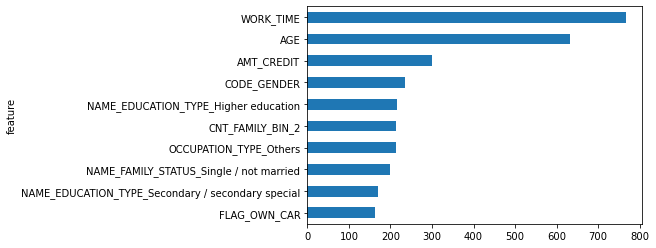

In [157]:
df_all_features.head(10).groupby(["feature"]).importance.mean().sort_values(ascending=True).plot.barh()
plt.show()

# Evaluation Model use ROC-AUC

# ROC-AUC Logistic Regression

In [123]:
y_pred_proba = logistic.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

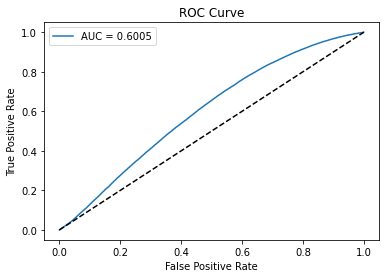

In [125]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [126]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [127]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,411510,1,4.808518e-34,1,1,0,0.000006,0.000012,0.000000
1,473461,1,8.861990e-18,2,2,0,0.000012,0.000024,0.000000
2,203668,0,3.918485e-12,3,2,1,0.000018,0.000024,0.000012
3,287432,0,1.183900e-04,4,2,2,0.000024,0.000024,0.000024
4,102989,0,2.917621e-04,5,2,3,0.000029,0.000024,0.000035


# ROC-AUC Decision Tree

In [128]:
y_pred_proba = decision_tree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

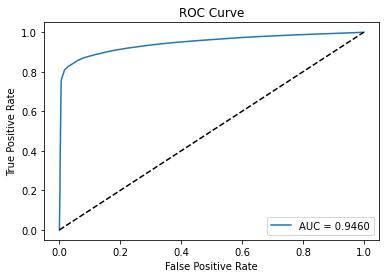

In [129]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# ROC-AUC Random Forest

In [130]:
y_pred_proba = random_forest.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

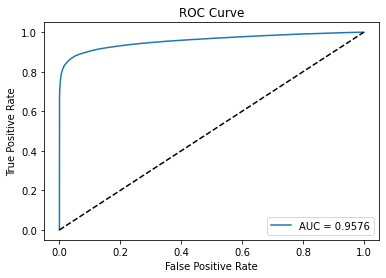

In [131]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# ROC-AUC LGBM

In [132]:
y_pred_proba = lgbm.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

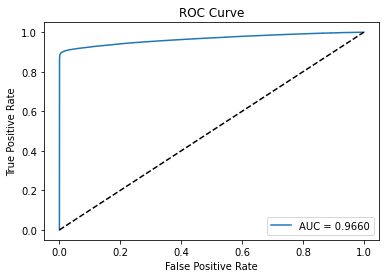

In [133]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Conclusion
Of the several models that have been used, the LGBM Classifier has been chosen as the model which because it has an accuration score of 94.5% by using ROC-AUC as a method in evaluating the model, the ROC-AUC value of the LGBM classifier is also at 96.6%.